In [1]:
# COVID19 Tweets: Tweets with the hashtag "#covid19"


### Objective:
* To perform analysis on people tweets about COVID-19. Use this data to derive breakthrough insights like finding what kind of subjects use this hashtag, look at the geographical distribution (country), cluster and evaluate sentiments, look at trends (on an average, candidate shares at least 7 substantial insights).


### Loading All necessary file to build a model

In [2]:
# Common lib necessary for performing textual data
import pandas as pd
import numpy as np 
import re
import string
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* Download package stopwords from nltk libraries and for visualization importing matplotlib,seaborn and wordcloud lib etc.

In [3]:
# Loading some nltk module.
from nltk.corpus import stopwords
from nltk.util import ngrams

# Stop word of English alpahbet lib
stop=set(stopwords.words('english'))

from collections import defaultdict
from collections import Counter

# Necessary file for Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib
import matplotlib.patches as mpatches
plt.style.use('ggplot')
from wordcloud import WordCloud

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Text Feature extraction and fit into some matrix formate
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin


# decomposition of data using TruncatedSVD
from sklearn.decomposition import TruncatedSVD

# ML Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split

# DL Tensorflow->keras model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers

# Atlast Accuracy score, confusion matrix, Classification report for all '0' and "1" prediction.
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 



### Reading CSV data using pandas lib pd.read_csv('name of file')

In [5]:
df =pd.read_csv('/content/covid19_tweets.csv')

In [6]:
# Top five rows of df
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [7]:
df.shape

(179108, 13)

* Our dataset contain Rows=179108 and columns =13 

### Data Description

In [8]:
# Description of numeric dataset like no of user friends , user followers, favourites
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [9]:
# Columns Text of rows 179091 .
df['text'][179091]

'@dougmillsnyt @realDonaldTrump @FLOTUS "The #Trump Family" contributed to the already 180,000+ lives lost &amp; "famili… https://t.co/4gkDRV6api'

* In Our dataset column text  contains hashtag , &amp, link,@ and some text

In [10]:
# Description of hashtag columns
df['hashtags'].describe()

count          127774
unique          52640
top       ['COVID19']
freq            37792
Name: hashtags, dtype: object

* Detail Description about hashtag like No of unique rows i.e 52640,total rows and   most of them rows are "['COVID19']"

### Data Information

In [11]:
# Information of Dataset like finding all columns if null rows exisists or not and there Datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


* columns name "user_location","user_description","hashtags","source" contains some null values/rows i.e NaN and rest are no null values

### Top 10 rows of "tweet" which is text columns in df

In [12]:
# All text rows from 0 t0 10 rows with max columns width flag
pd.options.display.max_colwidth = -1
df['text'][:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


0    If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0
1    Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu
2    @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3
3    @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW 
4    25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh 
5    #coronavirus #covid19 deaths continue to rise. It's almost  as bad as it ever was.  Politicians and businesses want… https://t.co/hXMHooXX2C
6    How #COVID19 Will Change Work in General (and recruiting, specifically) via/ @ProactiveTalent #Recruiting… https://t.co

### Data Filtering using regex re to find -:
* column name 'text' contains or using hastag of covid19 i.e. #COVID19 
* ignoring uppercase,lowercase or other hashtags
* creating new dataframe name covid_df storing rows that contains hashtag of covid19 i.e. #covid19

In [13]:
covid_df = df.loc[df['text'].str.contains('#COVID19',flags=re.I,regex=True)]

### Description of dataframe  covid_df

In [14]:
covid_df.describe()

,user_followers,user_friends,user_favourites
count,1.002600e+05,100260.000000,1.002600e+05
mean,1.423786e+05,2003.963645,1.524439e+04
std,9.847882e+05,8500.204782,4.857391e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,2.000000e+02,152.000000,2.340000e+02
50%,1.107500e+03,547.000000,1.916000e+03
75%,5.927000e+03,1703.000000,9.837000e+03
max,4.944256e+07,497321.000000,2.047197e+06


#### Creating new Columns name 'covid_tweets' which define the user tweet -:
* If text columns consists hashtag "#covid19" irrespective of small letters or capital or any other tags mention in there tweets .
* Columns name text contains string with hashtag covid19.
* Using regex "re" to use for equal and ignore case irrespective of small or capital letters. 
* If "#covid19" exists in text means text/tweet for a perticular user tweets are related to covid19,so it is defined as True or 1.
* Otherwise tweets are related to some other information represent as "0".
* Later this  column name  'covid_tweet' became the targt variable .

In [15]:
df.loc[df['text'].str.contains('#COVID19',flags=re.I,regex=True),'covid_tweets']=1


In [16]:
#Top five rows of datafarme
df['covid_tweets'].head()

0   NaN 
1   NaN 
2    1.0
3    1.0
4    1.0
Name: covid_tweets, dtype: float64

#### Fill all null values as "0" using df['col_name'].fillna(0) method 

In [17]:
# All null values in covidtweets represent as 0
df['covid_tweets']=df['covid_tweets'].fillna(0)

In [18]:
# Now we can see all values in covid_tweets represent as 0 for other tweets and 1 for covid19 tweets
df['covid_tweets'].head()

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: covid_tweets, dtype: float64

In [19]:
# Top five values of dataframe
df.loc[df['covid_tweets']==1].head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,covid_tweets
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,['COVID19'],Twitter for Android,False,1.0
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,['COVID19'],Twitter for iPhone,False,1.0
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,1.0
5,🎹 Franz Schubert,Новоро́ссия,"🎼 #Новоро́ссия #Novorossiya #оставайсядома #STAYatHOME Polymath, composer, English.",2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise. It's almost as bad as it ever was. Politicians and businesses want… https://t.co/hXMHooXX2C,"['coronavirus', 'covid19']",Twitter Web App,False,1.0
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a friendly place. Corporate blog of @ITMGroup by @Sharlyn_Lauby. Cheers!,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,"How #COVID19 Will Change Work in General (and recruiting, specifically) via/ @ProactiveTalent #Recruiting… https://t.co/bjZxzGPMbK","['COVID19', 'Recruiting']",Buffer,False,1.0


#### Description of "user_location"
* Top most users_location are from india, 
* 26920  rows are unique,some are null values while some are same locations

In [20]:
df['user_location'].describe()

count     142337
unique    26920 
top       India 
freq      3741  
Name: user_location, dtype: object

#### Find no of times perticular location occurs in the dataset
* Grouping of user_location in count columns which represent of a perticular location occur in our dataset

* here represent top 10 values of grouping  "user_location"

In [21]:
df['count']=1
df.groupby(df['user_location']).count()['count'].head(10)

user_location
\nˢᵒᵐᵉʷʰᵉʳᵉ\n🖤                   4 
                                 33
     Cathlamet, Wa.              1 
   Canada 🇨🇦🍁🛶🌲                  1 
   WorldWide                     1 
  Baile Átha Cliath/Mhaigh Eo    1 
  FL, Mass, New Hampshire        1 
  Fujairah                       1 
  NO investment advice given     3 
  Shropshire England             2 
Name: count, dtype: int64

### Data Visualization

* "1" represent covid tweets
* while "0" represent other tweets
* take out all no of rows exists in both '0' and '1' using df[].shape[0] 

In [22]:
# extracting the number of examples of each class
tweet_covid = df[df['covid_tweets'] == 1].shape[0]
Not_covid = df[df['covid_tweets'] == 0].shape[0]


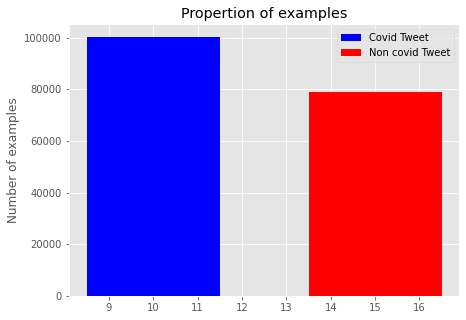

In [23]:
# bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,tweet_covid,3, label="Covid Tweet", color='blue')
plt.bar(15,Not_covid,3, label="Non covid Tweet", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()


#### Number of characters in tweets


In [24]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)


In [25]:
df['length'] = df['text'].apply(length)


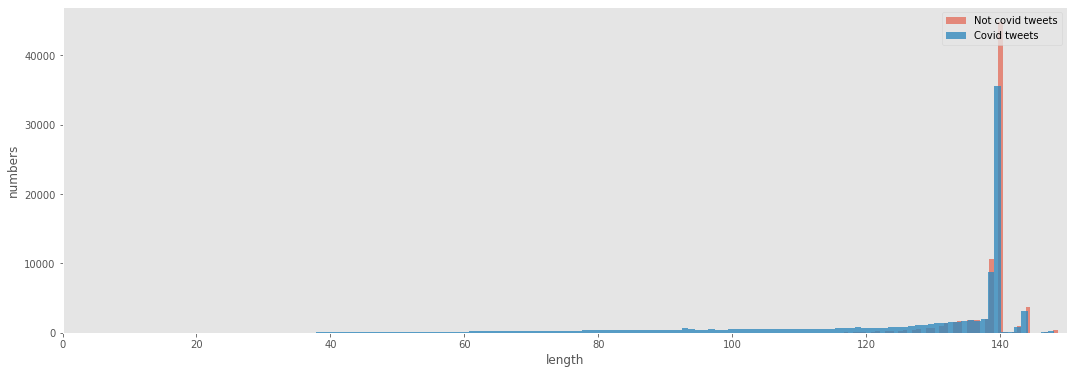

In [26]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)# figure size
bins = 150
# Histogram no of characters rep. by both the class
plt.hist(df[df['covid_tweets'] == 0]['length'], alpha = 0.6, bins=bins, label='Not covid tweets')
plt.hist(df[df['covid_tweets'] == 1]['length'], alpha = 0.8, bins=bins, label='Covid tweets')

#labelling x and y axis.
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()


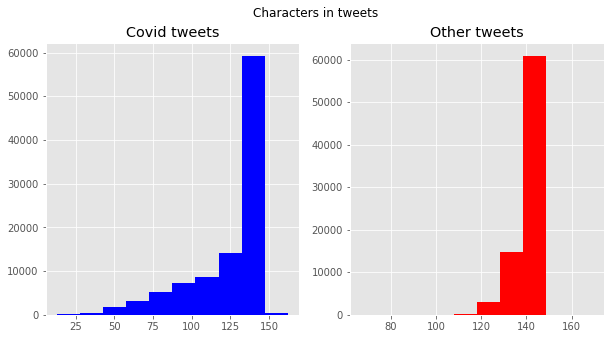

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['covid_tweets']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('Covid tweets')
tweet_len=df[df['covid_tweets']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Other tweets')
fig.suptitle('Characters in tweets')
plt.show()


* Distribution of covid tweets are greater than other tweets in dataset

#### Total words consists of tweets

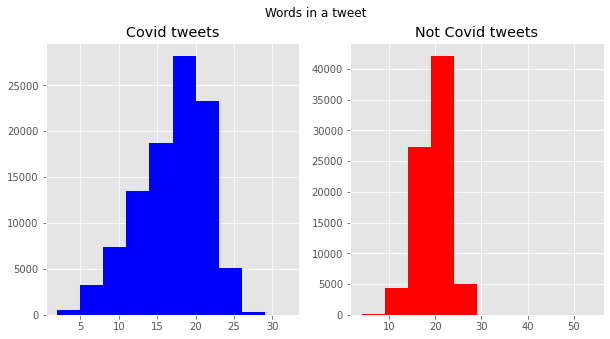

In [28]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))# representation of diag with a perticular size mention in figsize.
# Splitting text of class 1 with using lambda func to find length of words and map into the var
tweet_len=df[df['covid_tweets']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')# histogram of class 1 represent with blue color
ax1.set_title('Covid tweets')

# Splitting text of class 0 with using lambda func to find length of words
tweet_len=df[df['covid_tweets']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='red')# class 0 represent with blue color
ax2.set_title('Not Covid tweets')
fig.suptitle('Words in a tweet')
plt.show()


#### Average word length in a tweet

Text(0.5, 0.98, 'Average word length in each tweet')

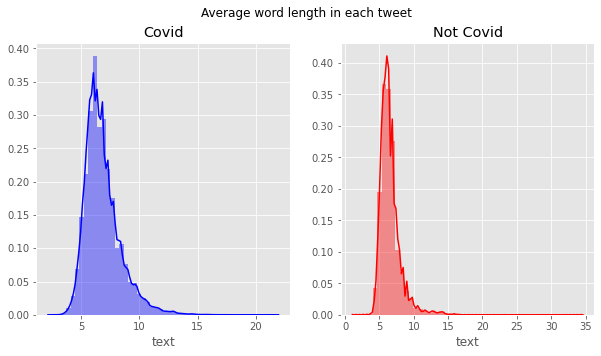

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['covid_tweets']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Covid')
word=df[df['covid_tweets']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Not Covid')
fig.suptitle('Average word length in each tweet')


#### Creating function consists of corpus list which spliting word from text/tweet which have a target later represent  as 0 and 1.
* Creating empty list name corpus and append in later or return value by calling  function

In [30]:
def create_corpus(target):
    corpus=[]
    
    for x in df[df['covid_tweets']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


In [31]:
def create_corpus_df(tweet, target):
    corpus=[]
    
    for x in df[df['covid_tweets']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


#### Common stopwords in tweets

In [32]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

In [33]:
# displaying the stopwords
np.array(stop)

array({'should', 'theirs', 'it', 'here', 'both', 'them', 'will', 'be', 'there', 'he', 'nor', 'wasn', 'shan', 'when', 'hers', 'any', 'all', "that'll", 'was', 'those', 'being', 'what', 'under', 'you', 'of', 'and', 'after', 'until', 'this', 'am', 'do', 'himself', 'below', "wasn't", 'while', 'yourselves', 'couldn', 'further', 'other', 'have', 'm', 'about', 'or', 'needn', 'each', 'o', 'doing', 'i', 'most', 'just', 'ours', 'on', 'before', 'myself', 'weren', 'our', 'off', 'against', 'y', "should've", "wouldn't", 'only', 'her', 'isn', 'between', "weren't", 'ain', 'won', 'if', 'aren', 'no', 'herself', "doesn't", 'that', 'has', 'by', 'having', 'during', 'then', 'up', 'wouldn', 're', "needn't", 'from', 'own', "it's", 'had', 'his', 'were', 'doesn', "you'd", "don't", "isn't", 'some', "shan't", 'don', 'mightn', 'which', 'more', 's', 'same', 'very', 'hadn', 'how', "she's", 'their', 'mustn', 'been', 'as', 've', 'she', 't', 'is', 'can', "hadn't", "couldn't", 'we', "you'll", 'themselves', 'where', 'they

#### First we will analyze tweets with class 0.


<BarContainer object of 10 artists>

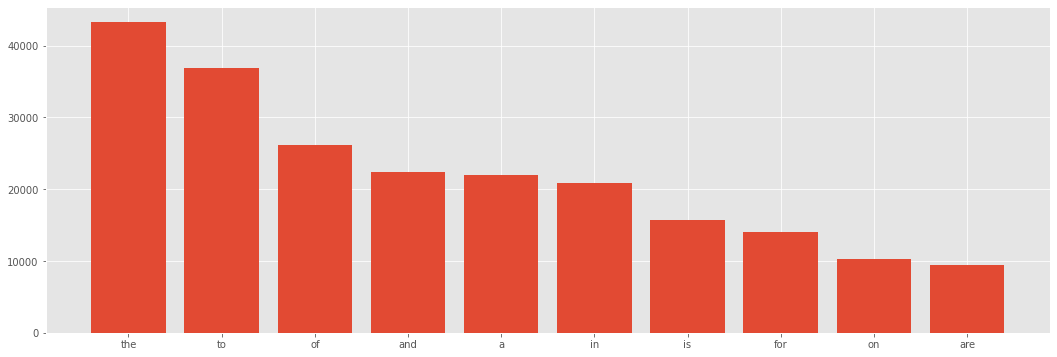

In [34]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)


#### Now we will analyze tweets with class 1.


<BarContainer object of 10 artists>

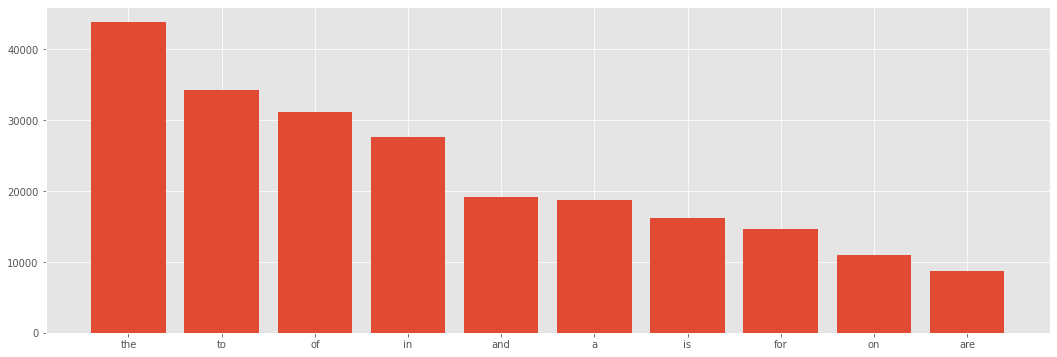

In [35]:
corpus=create_corpus(1) # calling method previosly define and passing value 1

#Creating dict and counting no of perticular stop words comes in text tweet
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)


#### Analysing punctuations
* Analyse for class 1

<BarContainer object of 27 artists>

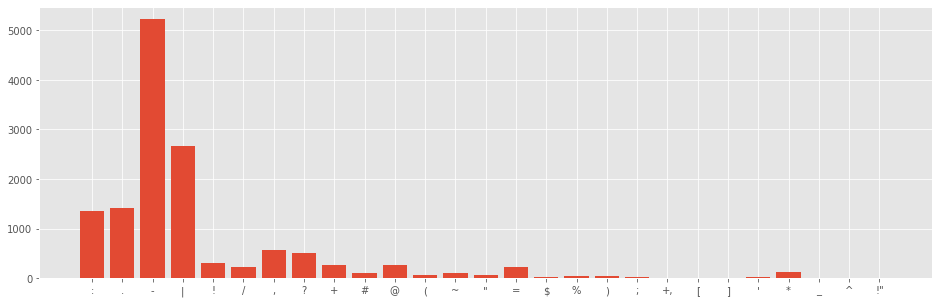

In [36]:
plt.figure(figsize=(16,5))# Represent the size of the image
corpus=create_corpus(1)# Calling method with passing 1 value represent class 1

dic=defaultdict(int)
special = string.punctuation# String  of punctuation 
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)


* Now analyse punctuation in class 0 
* represent with color green

<BarContainer object of 27 artists>

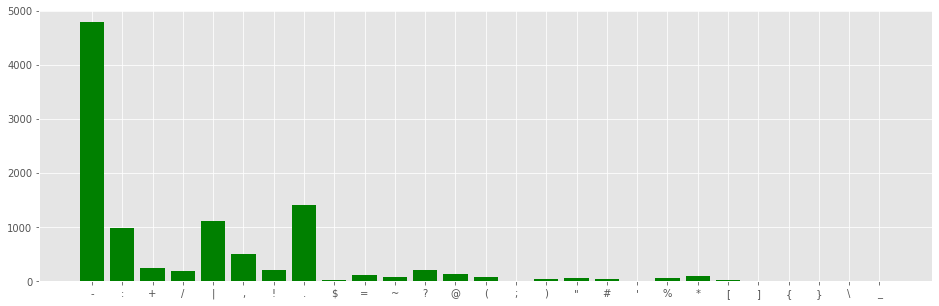

In [37]:
plt.figure(figsize=(16,5))
corpus=create_corpus(0)
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')


#### Common words

In [38]:
plt.figure(figsize=(16,5))
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)


<Figure size 1152x360 with 0 Axes>

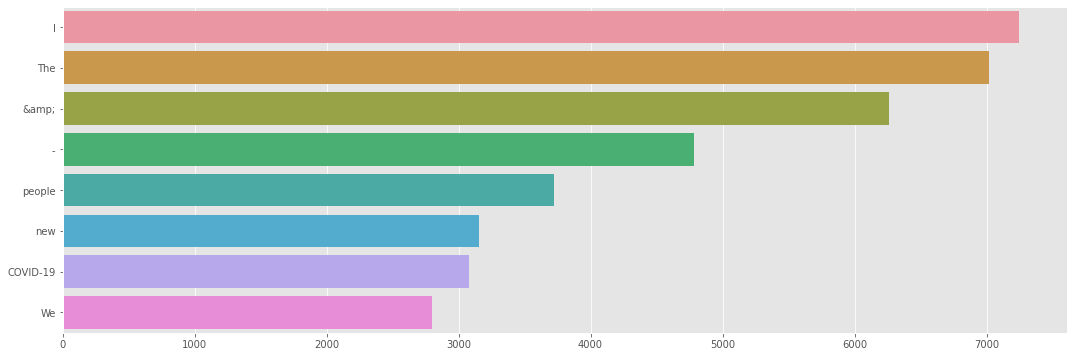

In [39]:
sns.barplot(x=y,y=x)


#### N-gram analysis

In [40]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

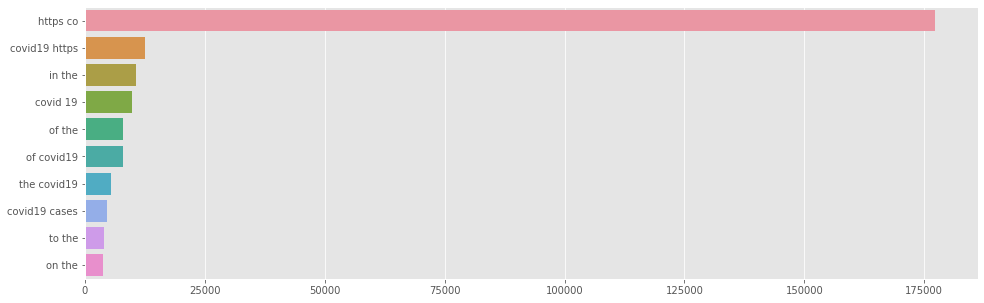

In [41]:
plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_tweet_bigrams(df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)


### Word Cloud


* Word Cloud for Covid Tweets

In [42]:
## Covid_tweets
corpus_new1=create_corpus_df(df['text'],1)


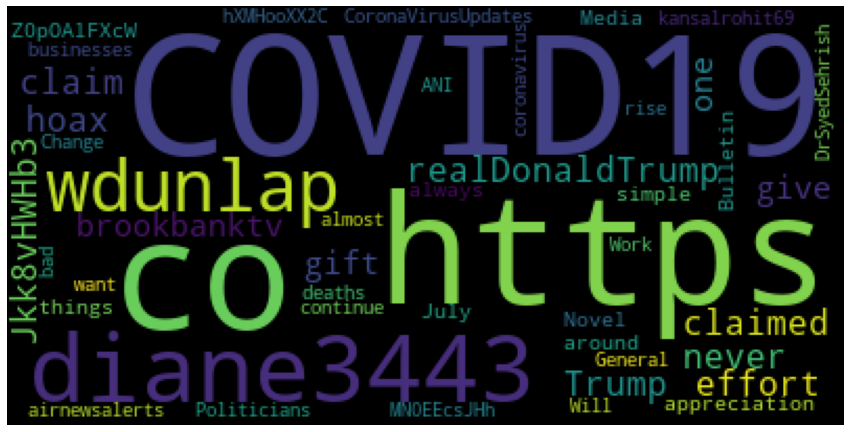

In [43]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(15,10))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new1[:80]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()


In [44]:
corpus_new0=create_corpus_df(df['text'],0)
corpus_new0[:10]


['If',
 'I',
 'smelled',
 'the',
 'scent',
 'of',
 'hand',
 'sanitizers',
 'today',
 'on']

### Word Cloud  for Not a Covid tweets

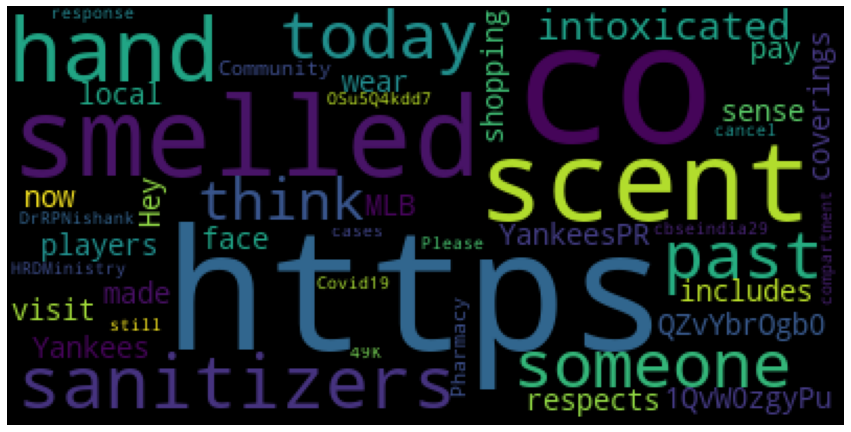

In [45]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(15,10))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new0[:80]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()


## Pre-processing
* Text cleaning
* Tweets contain different kind of noise that can harm machine learning algorithms performance. We need tocarefully get rid of them. To this particular task we will take advantage of regular expressions.


#### Rows and olumns in dataset

In [46]:
df.shape

(179108, 16)

#### Cleaning  dataset text/tweets using regular expression re and tokenize into word . 

In [47]:
token_text=[]
for i in range(179108):
    text = re.sub(r'@\w+', '',str(df['text'][i]))
    
    #URL’s
    text = re.sub(r'http.?://[^\s]+[\s]?', '', text)
    
    #Symbols and digits: points, hashtags, commas and all kind of symbols as well as numbers are removed.
    text = re.sub('[^a-zA-Z\s]', '', text)

    #Extra white spaces: after applying previous steps, texts could end up with extra white spaces that later the tokenizer will split as words. We remove them.
    text = re.sub("\s+", ' ', text)
    text = text.lstrip()
    text = text.rstrip()
    
    #Lowercase: we do not consider letter case so all texts are transformed to lowercase.
    text = text.lower()


    #Fixing words: people make typos (‘cafire’ ), use abbreviations (‘ppl’), acronyms (‘asap’) and 
    #different words have the same meaning (‘iphone’ and ‘phone’). 
    #These are just four examples of words that need to be fixed. 
    #This examples were found by inspecting the frequency vocabulary. 
    text = re.sub(r'\bppl\b', 'people', text)
    text = re.sub(r'\basap\b', 'as soon as possible', text)
    re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
    def tokenize(s): 
        return re_tok.sub(r' \1 ', s).split()
    token_text.append(tokenize(text))
    #print(tokenize(text))


#### Creating dataframe of text token

In [48]:
tokenize = pd.DataFrame({"token":token_text})
my_tokenize_df = pd.concat([df['text'],tokenize],axis=1)# concatenate tokenize data with text

del tokenize


#### Compare diff bet normal tweet and tokenize tweet


In [49]:
my_tokenize_df.head()

,text,token
0,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0","[if, i, smelled, the, scent, of, hand, sanitizers, today, on, someone, in, the, past, i, would, think, they, were, so, intoxicated, that]"
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,"[hey, and, wouldnt, it, have, made, more, sense, to, have, the, players, pay, their, respects, to, the, a]"
2,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,"[trump, never, once, claimed, covid, was, a, hoax, we, all, claim, that, this, effort, to]"
3,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,"[the, one, gift, covid, has, give, me, is, an, appreciation, for, the, simple, things, that, were, always, around, me]"
4,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,"[july, media, bulletin, on, novel, coronavirusupdates, covid]"


#### Custom transform and cleaning data

In [50]:
# Custom transformer
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

In [51]:
# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return str(text).strip().lower()


In [52]:
token_pred=predictors().transform(my_tokenize_df['token'])


#### Using Count Vectorizer- to transform our text data to matrix formate

In [53]:
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = token_pred
list_labels = df["covid_tweets"].tolist()

# Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)


#### Plot LSA Visualization

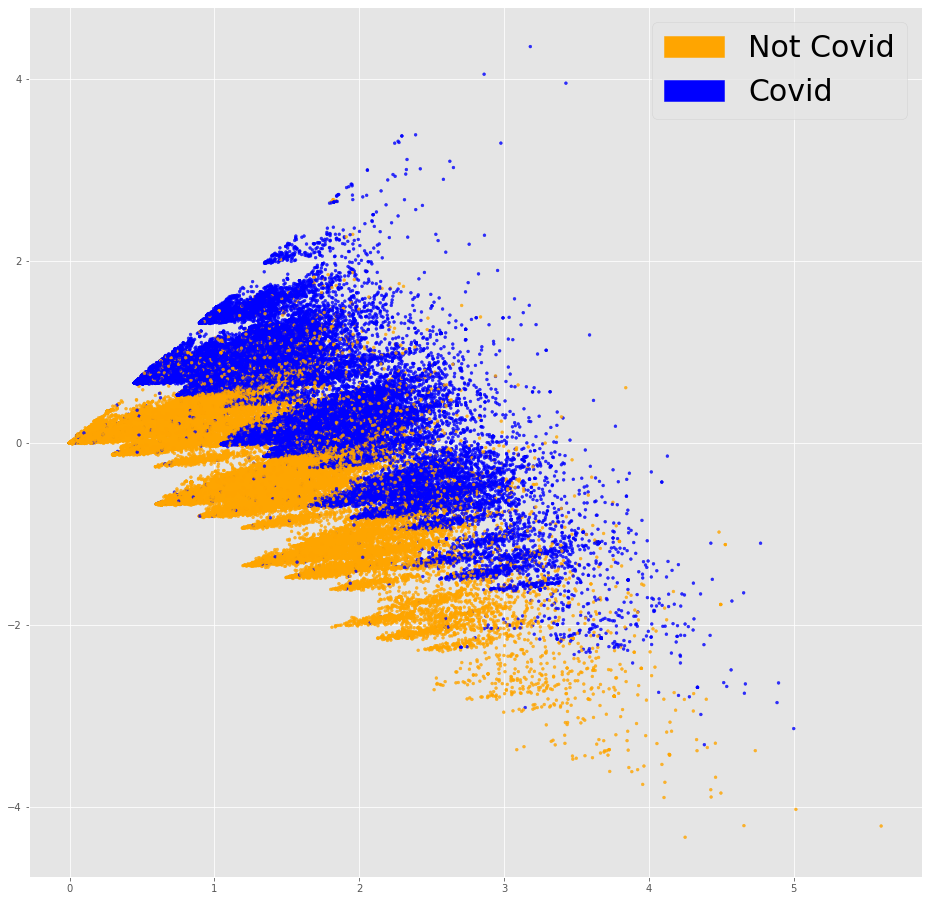

In [54]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Not Covid')
            blue_patch = mpatches.Patch(color='blue', label='Covid')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()


#### Plot LSA using tfidfVectorizer

In [55]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

plot lsa for tfidf

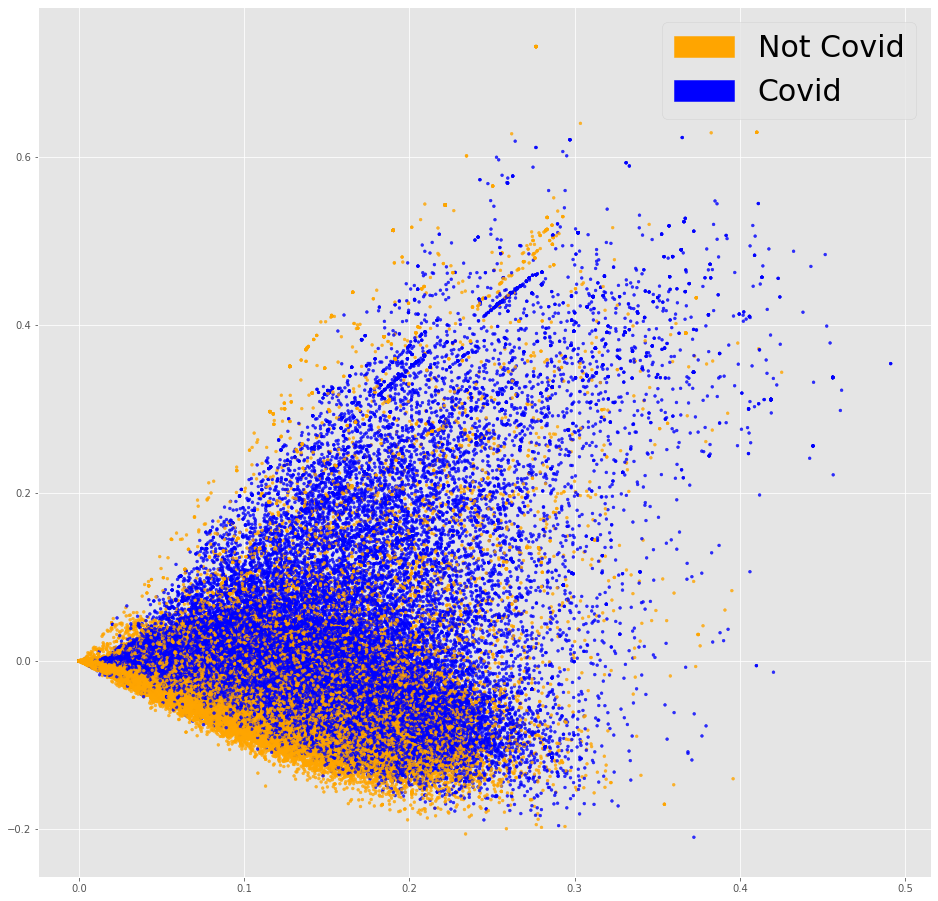

In [56]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()


### Training our model using Other Classifier
* Fitting Machine learning algo and compare there training and testing score
* To check Data underfitting or Overfitting the model by comparing there score.
* In underfitting condition- model accuracy is very low.
* In Overfitting condtion- training accuracy is high but testing accuracy is exponentially low as compare to training.
* Chose the best algo suited for our model
* Find Accuracy score , confusion matrix, classsification report


In [57]:
lr = LogisticRegression()
rfc =RandomForestClassifier(max_depth=30)
lsvc = LinearSVC(C=0.01)
ad_boost = AdaBoostClassifier()

In [58]:
ml_model = []
ml_model.append(("LogisticRegression",lr))
ml_model.append(('RandomForestClassifier',rfc))
ml_model.append(('LinearSVC',lsvc))



In [59]:
for name, algo in ml_model:
    algo.fit(X_train_tfidf,y_train)
    train_score=algo.score(X_train_tfidf,y_train)
    test_score = algo.score(X_test_tfidf,y_test)
    msg = "%s = (training score): %f (testing score:) %f"%(name,train_score,test_score)
    print(msg)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression = (training score): 0.953945 (testing score:) 0.954078
RandomForestClassifier = (training score): 0.931277 (testing score:) 0.911786
LinearSVC = (training score): 0.949981 (testing score:) 0.951901


* Logistic reg will predict the best score niether underfitting nor overfitting as compare to other classifier


In [60]:
# Prediction
from sklearn import metrics
lr.fit(X_train_tfidf,y_train)
pred = lr.predict(X_test_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
print("LogReg  Classification_report:",metrics.classification_report(y_test,pred))
print("====================================================================================\n")
print("LogReg Confusion Matrix:",metrics.confusion_matrix(y_test, pred))
print("====================================================================================\n")
print("Accuracy",metrics.accuracy_score(y_test,pred))


LogReg  Classification_report:               precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     15745
         1.0       0.93      0.99      0.96     20077

    accuracy                           0.95     35822
   macro avg       0.96      0.95      0.95     35822
weighted avg       0.96      0.95      0.95     35822


LogReg Confusion Matrix: [[14298  1447]
 [  198 19879]]

Accuracy 0.9540784992462732


In [62]:
### Deep Learning LSTM using keras model


* No of rows and columns in train dataset

In [63]:
X_test_tfidf.shape

(35822, 88271)

* Next, we'll convert text data into token vectors.


In [64]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(token_pred)
xtrain= tokenizer.texts_to_sequences(X_train)
xtest= tokenizer.texts_to_sequences(X_test) 


* Convert all training and test data into numpy array

In [65]:
X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)


* We'll apply a padding method to add zeros and set the fixed size into each vector.


In [66]:
maxlen=10
xtrain=pad_sequences(xtrain,padding='post', maxlen=maxlen)
xtest=pad_sequences(xtest,padding='post', maxlen=maxlen)

print(X_train[3])

['bigfight', 'congress', 'spokesperson', 'supriya', 'shrinate', 'on', 'health', 'infrastructure', 'in', 'the', 'country', 'covid']


In [67]:
print(xtrain[3])

[10 58  5  2  1  0  0  0  0  0]


#### Defining the LSTM model

* We apply the Embedding layer for input data before adding the LSTM layer into the Keras sequential model. The model definition goes as a following.


In [68]:
embedding_dim=50
model=Sequential()
model.add(layers.Embedding(input_dim=100,
      output_dim=embedding_dim,
      input_length=maxlen))
model.add(layers.LSTM(units=20,return_sequences=True))
model.add(layers.LSTM(units=10))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(28))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", 
     metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 50)            5000      
_________________________________________________________________
lstm (LSTM)                  (None, 10, 20)            5680      
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                1240      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 28)                308       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 29        
Total params: 12,257
Trainable params: 12,257
Non-trainable params: 0
____________________________________________________

#### Finally, we'll train the model and check the training accuracy.


In [69]:
history = model.fit(xtrain,y_train, epochs=20, batch_size=64)


Epoch 1/20
2239/2239 [==============================] - 18s 8ms/step - loss: 0.2495 - accuracy: 0.9287
Epoch 2/20
2239/2239 [==============================] - 18s 8ms/step - loss: 0.2245 - accuracy: 0.9397
Epoch 3/20
2239/2239 [==============================] - 18s 8ms/step - loss: 0.2215 - accuracy: 0.9408
Epoch 4/20
2239/2239 [==============================] - 18s 8ms/step - loss: 0.2198 - accuracy: 0.9410
Epoch 5/20
2239/2239 [==============================] - 18s 8ms/step - loss: 0.2175 - accuracy: 0.9419
Epoch 6/20
2239/2239 [==============================] - 18s 8ms/step - loss: 0.2161 - accuracy: 0.9421
Epoch 7/20
2239/2239 [==============================] - 18s 8ms/step - loss: 0.2142 - accuracy: 0.9426
Epoch 8/20
2239/2239 [==============================] - 18s 8ms/step - loss: 0.2140 - accuracy: 0.9427
Epoch 9/20
2239/2239 [==============================] - 18s 8ms/step - loss: 0.2121 - accuracy: 0.9435
Epoch 10/20
2239/2239 [==============================] - 18s 8ms/step - l

#### Visualize the training loss and te validation accuracy to see if the model is overfitting


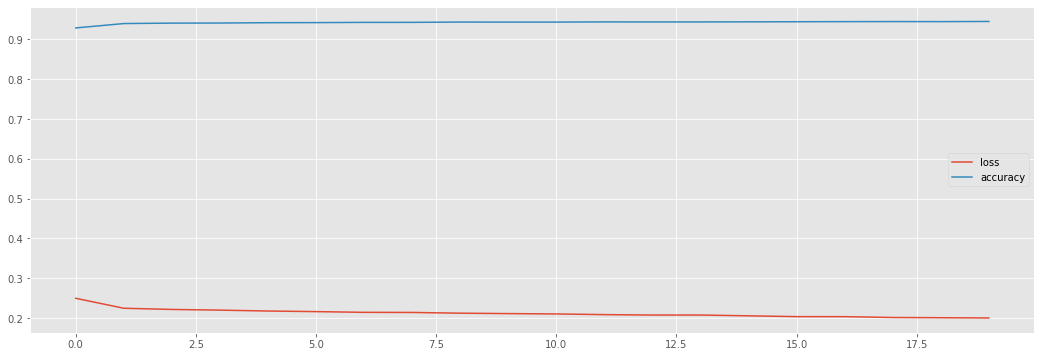

In [70]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim()
plt.show()


In [71]:
loss, acc = model.evaluate(xtrain, y_train,verbose=False)
print("Training Accuracy: ", acc)


Training Accuracy:  0.9467289447784424


In [72]:
loss, acc = model.evaluate(xtest, y_test, verbose=False)
print("Test Accuracy: ", acc)
print("Test Loss: ", loss)

Test Accuracy:  0.9457316994667053
Test Loss:  0.19406890869140625


#### Predicting test data


In [73]:
ypred=model.predict(xtest)

ypred[ypred>0.5]=1 
ypred[ypred<=0.5]=0 


#### Confusion Matrix define-:
* True Negative
* False Positive
* False Negative
* True Positive
  * diagonal element are correct prediction rest are incorrect prediction
  * Accuracy =Sum of all correct prediction(diagonal data) divided by sum of all the data(correct or wrong prediction data)


In [74]:
cm = confusion_matrix(y_test, ypred)
print(cm)


[[14306  1439]
 [  505 19572]]


#### Classification report Define_:
* precision-:precision is the fraction of relevant instances among the retrieved instances
* recall:-while recall is the fraction of the total amount of relevant instances that were actually retrieved
* f1-score-:F1 is an overall measure of a model’s accuracy that combines precision and recall, in that weird way that addition and multiplication just mix two ingredients to make a separate dish altogether


In [75]:
cr = classification_report(y_test,ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94     15745
         1.0       0.93      0.97      0.95     20077

    accuracy                           0.95     35822
   macro avg       0.95      0.94      0.94     35822
weighted avg       0.95      0.95      0.95     35822



### Finally result or prediction of test data  store in "re_store" list.

In [76]:
result=zip(X_test, y_test, ypred)
res_store=[]
for i in result:
    res_store.append(i)


### Top five values of result data with classes represent 1 or 0

In [77]:
res_store[:5]

[("['covid', 'kashmir', 'reports', 'fresh', 'death', 'of', 'covid', 'a', 'year', 'old', 'man', 'from', 'beerwah', 'budgam', 'died', 'at', 'cd', 'hospital', 'srinagar', 'death', 'toll', 'in', 'jk']",
  1.0,
  array([1.], dtype=float32)),
 ("['we', 'need', 'college', 'football', 'fuck', 'covid', 'ive', 'never', 'met', 'her', 'but', 'if', 'i', 'did', 'id', 'give', 'her', 'the', 'peoples', 'fuckin', 'elbow', 'on', 'b']",
  0.0,
  array([1.], dtype=float32)),
 ("['how', 'can', 'brands', 'use', 'times', 'of', 'uncertainty', 'to', 'drive', 'trust', 'hear', 'just', 'eats', 'discuss', 'how', 'covid', 'has', 'helped']",
  1.0,
  array([1.], dtype=float32)),
 ("['we', 'are', 'going', 'to', 'months', 'people', 'still', 'cant', 'see', 'covid', 'is', 'not', 'killing', 'a', 'lot', 'of', 'people', 'here']",
  1.0,
  array([1.], dtype=float32)),
 ("['if', 'juliusmalema', 'was', 'northkorean', 'eff', 'via', 'lockdownextension', 'covid', 'cyrilmustgo', 'ufelani']",
  1.0,
  array([1.], dtype=float32))]